In [ ]:
import re
import matplotlib


from itertools import chain
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [ ]:
words = pd.read_csv('collage_words.csv')
words.dropna(inplace=True)
words.head()

,Brand,Words
0,7UP,"no person, leaf, nature, flora, grass, food, w..."
1,7UP,"sunset, grinder, energy, water, industry, pier..."
2,7UP,"nature, hammock, tree, wood, summer, outdoors,..."
3,7UP,"portrait, man, people, one, adult, sunglasses,..."
4,7UP,"storm, rain, sunset, sky, landscape, dawn, nat..."


In [ ]:
cats = pd.read_csv('Categories.csv')
cats.dropna(inplace=True)
catwise = cats.groupby(by=['Category'], as_index=True).agg(lambda x: ", ".join(x)).squeeze()
cat=catwise['Cars'].split(", ")
cat

['Acura',
 'Audi',
 'BMW',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'Ferrari',
 'Ford',
 'GMC',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Lexus',
 'Lincoln',
 'Mazda',
 'Mercedes Benz',
 'Mitsubishi',
 'Nissan',
 'Pontiac',
 'Porsche',
 'Subaru',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [ ]:
brandwise = words.groupby(by=['Brand'], as_index=False).agg(lambda x: ", ".join(x))
brandwise=brandwise[brandwise.Brand.isin(cat)]
brandwise

,Brand,Words
9,Acura,"science, flame, biology, cellular telephone, a..."
26,Audi,"city, architecture, sky, urban, downtown, city..."
28,BMW,"aircraft, airplane, vehicle, airport, military..."
48,Buick,"car, vehicle, automotive, wheel, transportatio..."
51,Cadillac,"food, vegetable, market, cabbage, grow, health..."
65,Chevrolet,"landscape, sun, rural, grass, field, nature, c..."
68,Chrysler,"flag, stripe, administration, patriotism, unit..."
97,Dodge,"no person, agriculture, landscape, nature, cro..."
109,Ferrari,"crocodile, wildlife, alligator, danger, tooth,..."
114,Ford,"leather, old, people, no person, wear, fashion..."


In [ ]:
car_words=brandwise["Words"].values

In [ ]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=10)
lda = LatentDirichletAllocation(n_components=5, n_jobs=-1,random_state=101)
X = count_vectorizer.fit_transform(car_words)

In [ ]:
doc_topic = lda.fit_transform(X) 

In [ ]:
topic_word = lda.components_
#most_relevant_topics = np.flip(np.argsort(doc_topic, axis=1), axis=1)[:, :30]
most_relevant_words = np.flip(np.argsort(topic_word, axis=1), axis=1)[:, :50]

In [ ]:
TOPIC_WORDS=pd.DataFrame(topic_word, columns=count_vectorizer.get_feature_names_out())
TOPIC_WORDS

,abandoned,abundance,accessory,accident,achievement,acoustic,active,actor,actress,administration,...,wet,wheat,white,wind,windshield,wing,wire,wooden,yacht,zoo
0,8.658874,0.527454,10.280913,0.202242,11.120646,2.915996,2.412643,10.874440,3.152834,1.685296,...,34.139090,5.895089,20.359391,13.610725,0.202495,9.084542,0.202847,7.974337,3.625430,20.167050
1,42.478914,0.202455,2.706631,12.543534,5.781942,7.276663,5.445048,16.719124,8.938068,40.336463,...,22.118551,13.379680,32.754376,45.973701,16.218939,15.671325,4.398624,39.423098,0.202058,13.959884
2,10.764866,0.205087,0.201507,5.380253,2.335053,0.205690,4.243742,2.067362,0.200880,4.483189,...,8.083599,1.741523,10.209312,0.382587,0.202683,4.485417,13.166341,5.298945,4.254746,0.202599
3,3.893399,5.496511,0.201195,0.959173,10.326984,0.201741,0.200517,1.681679,0.870623,21.070539,...,1.608721,1.781451,11.331894,8.021602,1.689606,0.626307,0.200001,2.638890,0.200526,0.200316
4,0.203947,35.568493,2.609753,1.914798,61.435375,3.399910,5.698050,17.657396,4.837595,20.424513,...,14.050040,0.202257,13.345027,4.011384,1.686277,9.132409,3.032187,5.664731,17.717240,4.470150


topic  0


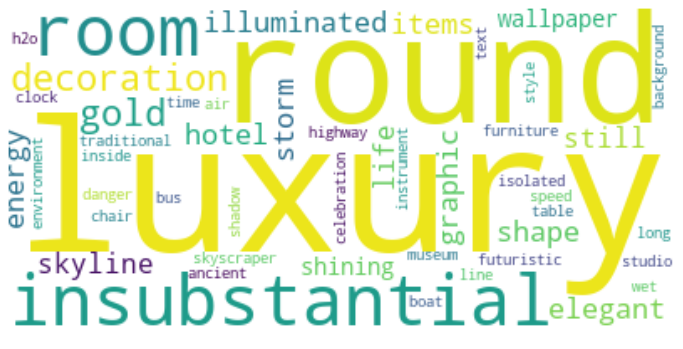

topic  1


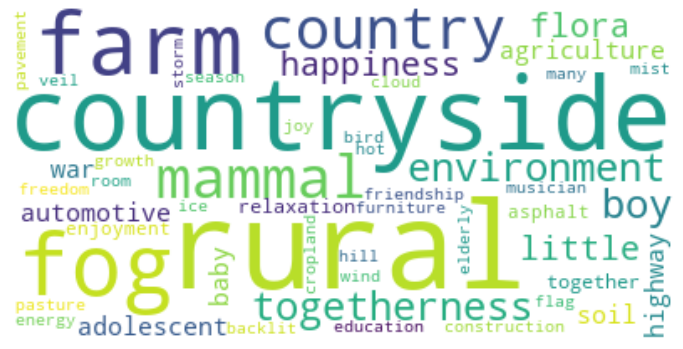

topic  2


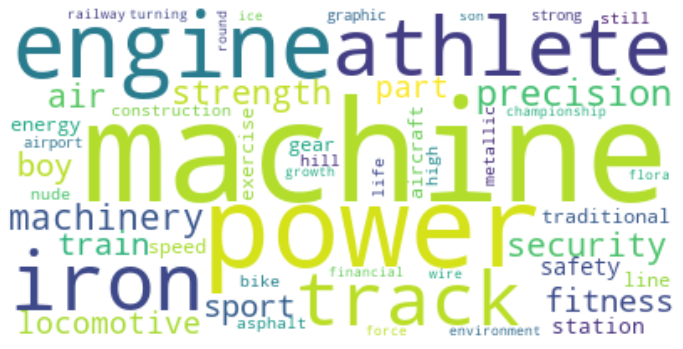

topic  3


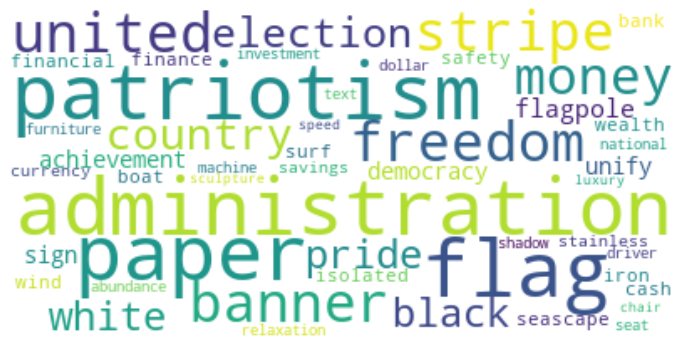

topic  4


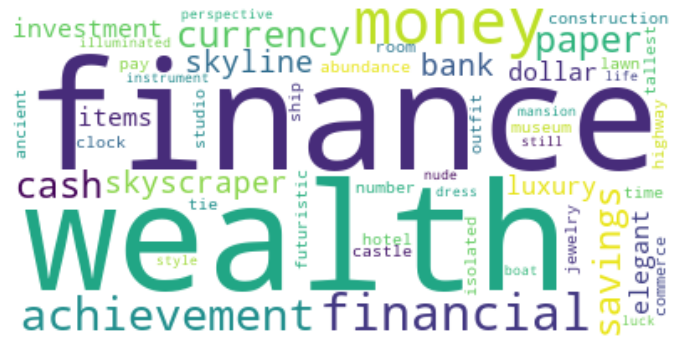

In [ ]:
cloud=[]
most_relevant_topic_words=[]
for i in range(5):
  print("topic ", i)
  text = ' '.join(np.array(count_vectorizer.get_feature_names_out())[most_relevant_words[i]])
  most_relevant_topic_words.append([i,np.array(count_vectorizer.get_feature_names_out())[most_relevant_words[i]]])
  cloud.append(WordCloud(background_color='white').generate(text))
  plt.imshow(cloud[i], interpolation='bilinear')
  plt.axis('off')
  plt.show()

Now let's look at the most popular words for different car brands

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05)
td_idf = np.array(vectorizer.fit_transform(brandwise["Words"].values).todense())
ids = np.flip(td_idf.argsort(axis=1), axis=1)

In [ ]:
TD_IDF=pd.DataFrame(td_idf, index=brandwise['Brand'], columns=vectorizer.get_feature_names_out())
TD_IDF.head()

,abandoned,abbey,abdomen,abdominal,abundance,access,accessory,accident,accomplishment,accuracy,...,written,yacht,yard,yarn,youth,zebra,zen,zoo,zoology,zoom
Brand,,,,,,,,,,,,,,,,,,,,,
Acura,0.028877,0.0,0.029768,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.020102,0.000000,0.0,0.000000,0.07535,0.0,0.116328,0.000000,0.023940
Audi,0.024147,0.0,0.000000,0.0,0.015535,0.000000,0.018280,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.013896,0.000000,0.020019
BMW,0.000000,0.0,0.000000,0.0,0.071042,0.000000,0.000000,0.000000,0.0,0.081022,...,0.026303,0.030747,0.060767,0.0,0.020256,0.00000,0.0,0.000000,0.042841,0.018309
Buick,0.046960,0.0,0.000000,0.0,0.000000,0.025895,0.053323,0.017032,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.043071,0.00000,0.0,0.013512,0.000000,0.000000
Cadillac,0.029233,0.0,0.000000,0.0,0.037615,0.000000,0.022130,0.021205,0.0,0.000000,...,0.034817,0.020349,0.026812,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000


In [ ]:
cat_inds = [list(brandwise['Brand'].values).index(brand) for brand in cat]
most_relevant_brand_words=[]
for i, brand in enumerate(cat):
    print(brand)
    text = ' '.join(np.array(vectorizer.get_feature_names())[ids[cat_inds[i], :50]])
    most_relevant_brand_words.append([brand, np.array(vectorizer.get_feature_names())[ids[cat_inds[i], :50]]])
    cloud = WordCloud(background_color='white').generate(text)
    # plt.imshow(cloud, interpolation='bilinear')
    # plt.axis('off')
    # plt.show()
    # if i ==0:
    #   break

Acura
Audi


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


BMW
Buick
Cadillac
Chevrolet
Chrysler
Dodge
Ferrari
Ford
GMC
Honda
Hyundai
Infiniti
Jeep
Kia
Lamborghini
Lexus
Lincoln
Mazda
Mercedes Benz
Mitsubishi
Nissan
Pontiac
Porsche
Subaru
Toyota
Volkswagen
Volvo


As we can see, some of these make no sense for us. Let's then create a score that says how similar a brand to a topic

In [ ]:
pd.DataFrame(most_relevant_brand_words)

,0,1
0,Acura,"[actor, safari, zoo, hotel, mammal, finelookin..."
1,Audi,"[lightning, thunderstorm, thunder, thunderbolt..."
2,BMW,"[clock, minute, time, watch, wristwatch, alarm..."
3,Buick,"[automotive, elderly, instrument, pavement, hi..."
4,Cadillac,"[hotel, juice, storm, fruit, nutrition, vegeta..."
5,Chevrolet,"[flora, rural, boy, farm, growth, country, dee..."
6,Chrysler,"[administration, united, flag, patriotism, emb..."
7,Dodge,"[rural, countryside, farm, country, agricultur..."
8,Ferrari,"[air, life, still, balloon, airplane, flight, ..."
9,Ford,"[mammal, farm, energy, backlit, instrument, pe..."


In [ ]:
pd.DataFrame(most_relevant_topic_words)

,0,1
0,0,"[luxury, round, insubstantial, room, decoratio..."
1,1,"[rural, countryside, farm, fog, country, mamma..."
2,2,"[machine, power, engine, athlete, iron, track,..."
3,3,"[administration, flag, patriotism, paper, stri..."
4,4,"[finance, wealth, money, financial, achievemen..."


In [ ]:
score=[]
for i in range(len(most_relevant_brand_words)):
  score_m=[]
  for j in range(len(most_relevant_topic_words)):
    inters=list(set(most_relevant_brand_words[i][1]).intersection(set(most_relevant_topic_words[j][1])))
    union=list(set(most_relevant_brand_words[i][1]).union(set(most_relevant_topic_words[j][1])))
    #union = most_relevant_brand_words[i][1] + [x for x in most_relevant_topic_words[j][1] if i not in most_relevant_brand_words[i][1]]
    score_m.append(len(inters)/len(union))
  score.append(score_m)
score=pd.DataFrame(score, columns=range(5), index=cat)
score

,0,1,2,3,4
Acura,0.123596,0.086957,0.041667,0.052632,0.098901
Audi,0.190476,0.030928,0.041667,0.030928,0.098901
BMW,0.063830,0.000000,0.030928,0.149425,0.282051
Buick,0.123596,0.190476,0.030928,0.063830,0.075269
Cadillac,0.111111,0.052632,0.020408,0.190476,0.162791
Chevrolet,0.010101,0.333333,0.063830,0.020408,0.010101
Chrysler,0.010101,0.041667,0.030928,0.612903,0.162791
Dodge,0.020408,0.265823,0.041667,0.075269,0.010101
Ferrari,0.136364,0.052632,0.086957,0.052632,0.111111
Ford,0.030928,0.136364,0.030928,0.041667,0.020408


In [ ]:
import copy
score_cleaned=copy.copy(score)
score_cleaned[score_cleaned<0.1]=0
score_cleaned[score_cleaned>0]=1
score_cleaned.columns=['luxury',"rural",'power', 'pariotism','finance']
score_cleaned

,luxury,rural,power,pariotism,finance
Acura,1.0,0.0,0.0,0.0,0.0
Audi,1.0,0.0,0.0,0.0,0.0
BMW,0.0,0.0,0.0,1.0,1.0
Buick,1.0,1.0,0.0,0.0,0.0
Cadillac,1.0,0.0,0.0,1.0,1.0
Chevrolet,0.0,1.0,0.0,0.0,0.0
Chrysler,0.0,0.0,0.0,1.0,1.0
Dodge,0.0,1.0,0.0,0.0,0.0
Ferrari,1.0,0.0,0.0,0.0,1.0
Ford,0.0,1.0,0.0,0.0,0.0


Curiosly, these things don't change majorly when we change number of top words used. Sure, number of topics change, but Toyota willalways be rural. That's a good sign